# <span style="color:#8B0000">Wine Wizardry: Uncorking Quality with Machine Learning Magic</span>

## Main Objective of the Analysis

The main objective of this analysis is to create a **classification model** to predict the **quality of wines** based on various physicochemical properties. 
The focus is both on **prediction accuracy** and **interpretability** to provide insights to wine producers about which features are most influential in determining the quality of wine. 
This analysis benefits wine producers and stakeholders by **identifying key factors that affect wine quality**, 
potentially **improving production processes** and **quality control**.

# Description of the Dataset
The Wine Quality Dataset contains 12 attributes (features) for different types of wines, including:
- Fixed acidity
- Volatile acidity
- Citric acid
- Residual sugar
- Chlorides
- Free sulfur dioxide
- Total sulfur dioxide
- Density
- pH
- Sulphates
- Alcohol
- **Quality** (**target variable**)

**Objective**: Predict the 'quality' of wine (a score between 0 and 10) using the physicochemical attributes.


In [8]:
# Data Exploration, Cleaning, and Feature Engineering

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use("ggplot")  #using style ggplot

%matplotlib inline

import plotly.graph_objects as go
import plotly.express as px

# Load the dataset
data = pd.read_csv("WineQT.csv")
data.head()


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,2
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,3
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,4


In [9]:
# Basic statistics
data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
count,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000
mean,8.311111,0.531339,0.268364,2.532152,0.086933,15.615486,45.914698,0.996730,3.311015,0.657708,10.442111,5.657043,804.969379
std,1.747595,0.179633,0.196686,1.355917,0.047267,10.250486,32.782130,0.001925,0.156664,0.170399,1.082196,0.805824,463.997116
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000,0.000000
25%,7.100000,0.392500,0.090000,1.900000,0.070000,7.000000,21.000000,0.995570,3.205000,0.550000,9.500000,5.000000,411.000000
50%,7.900000,0.520000,0.250000,2.200000,0.079000,13.000000,37.000000,0.996680,3.310000,0.620000,10.200000,6.000000,794.000000
75%,9.100000,0.640000,0.420000,2.600000,0.090000,21.000000,61.000000,0.997845,3.400000,0.730000,11.100000,6.000000,1209.500000
max,15.900000,1.580000,1.000000,15.500000,0.611000,68.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000,1597.000000


In [10]:
# Check for missing values
data.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
Id                      0
dtype: int64

We can see that the data is **clean**.

In [11]:
# Fill missing values if any (using median)
data.fillna(data.median(), inplace=True)

In [ ]:
# Feature engineering: Binning the 'quality' into categories (e.g., low, medium, high)
bins = [0, 4, 6, 10]
labels = ['Low', 'Medium', 'High']
data['quality'] = pd.cut(data['quality'], bins=bins, labels=labels)

# Drop columns ID , because we don't need it.
data.drop(columns="Id",inplace=True)

# Convert categorical target to numerical
data['quality'] = data['quality'].cat.codes

#Balance of classes
data['quality'].value_counts()

quality
1    945
2    159
0     39
Name: count, dtype: int64

In [18]:
#Number of Features:
print(data.shape)  # Number of rows and columns

(1143, 12)


<Axes: >

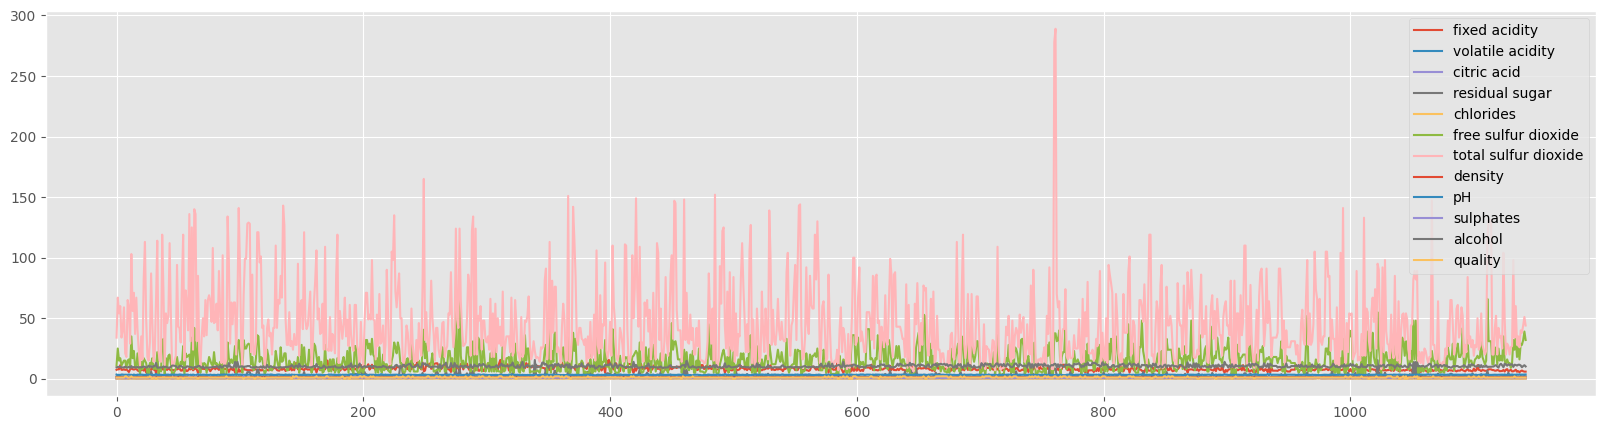

In [16]:
data.plot(figsize=(20,5))

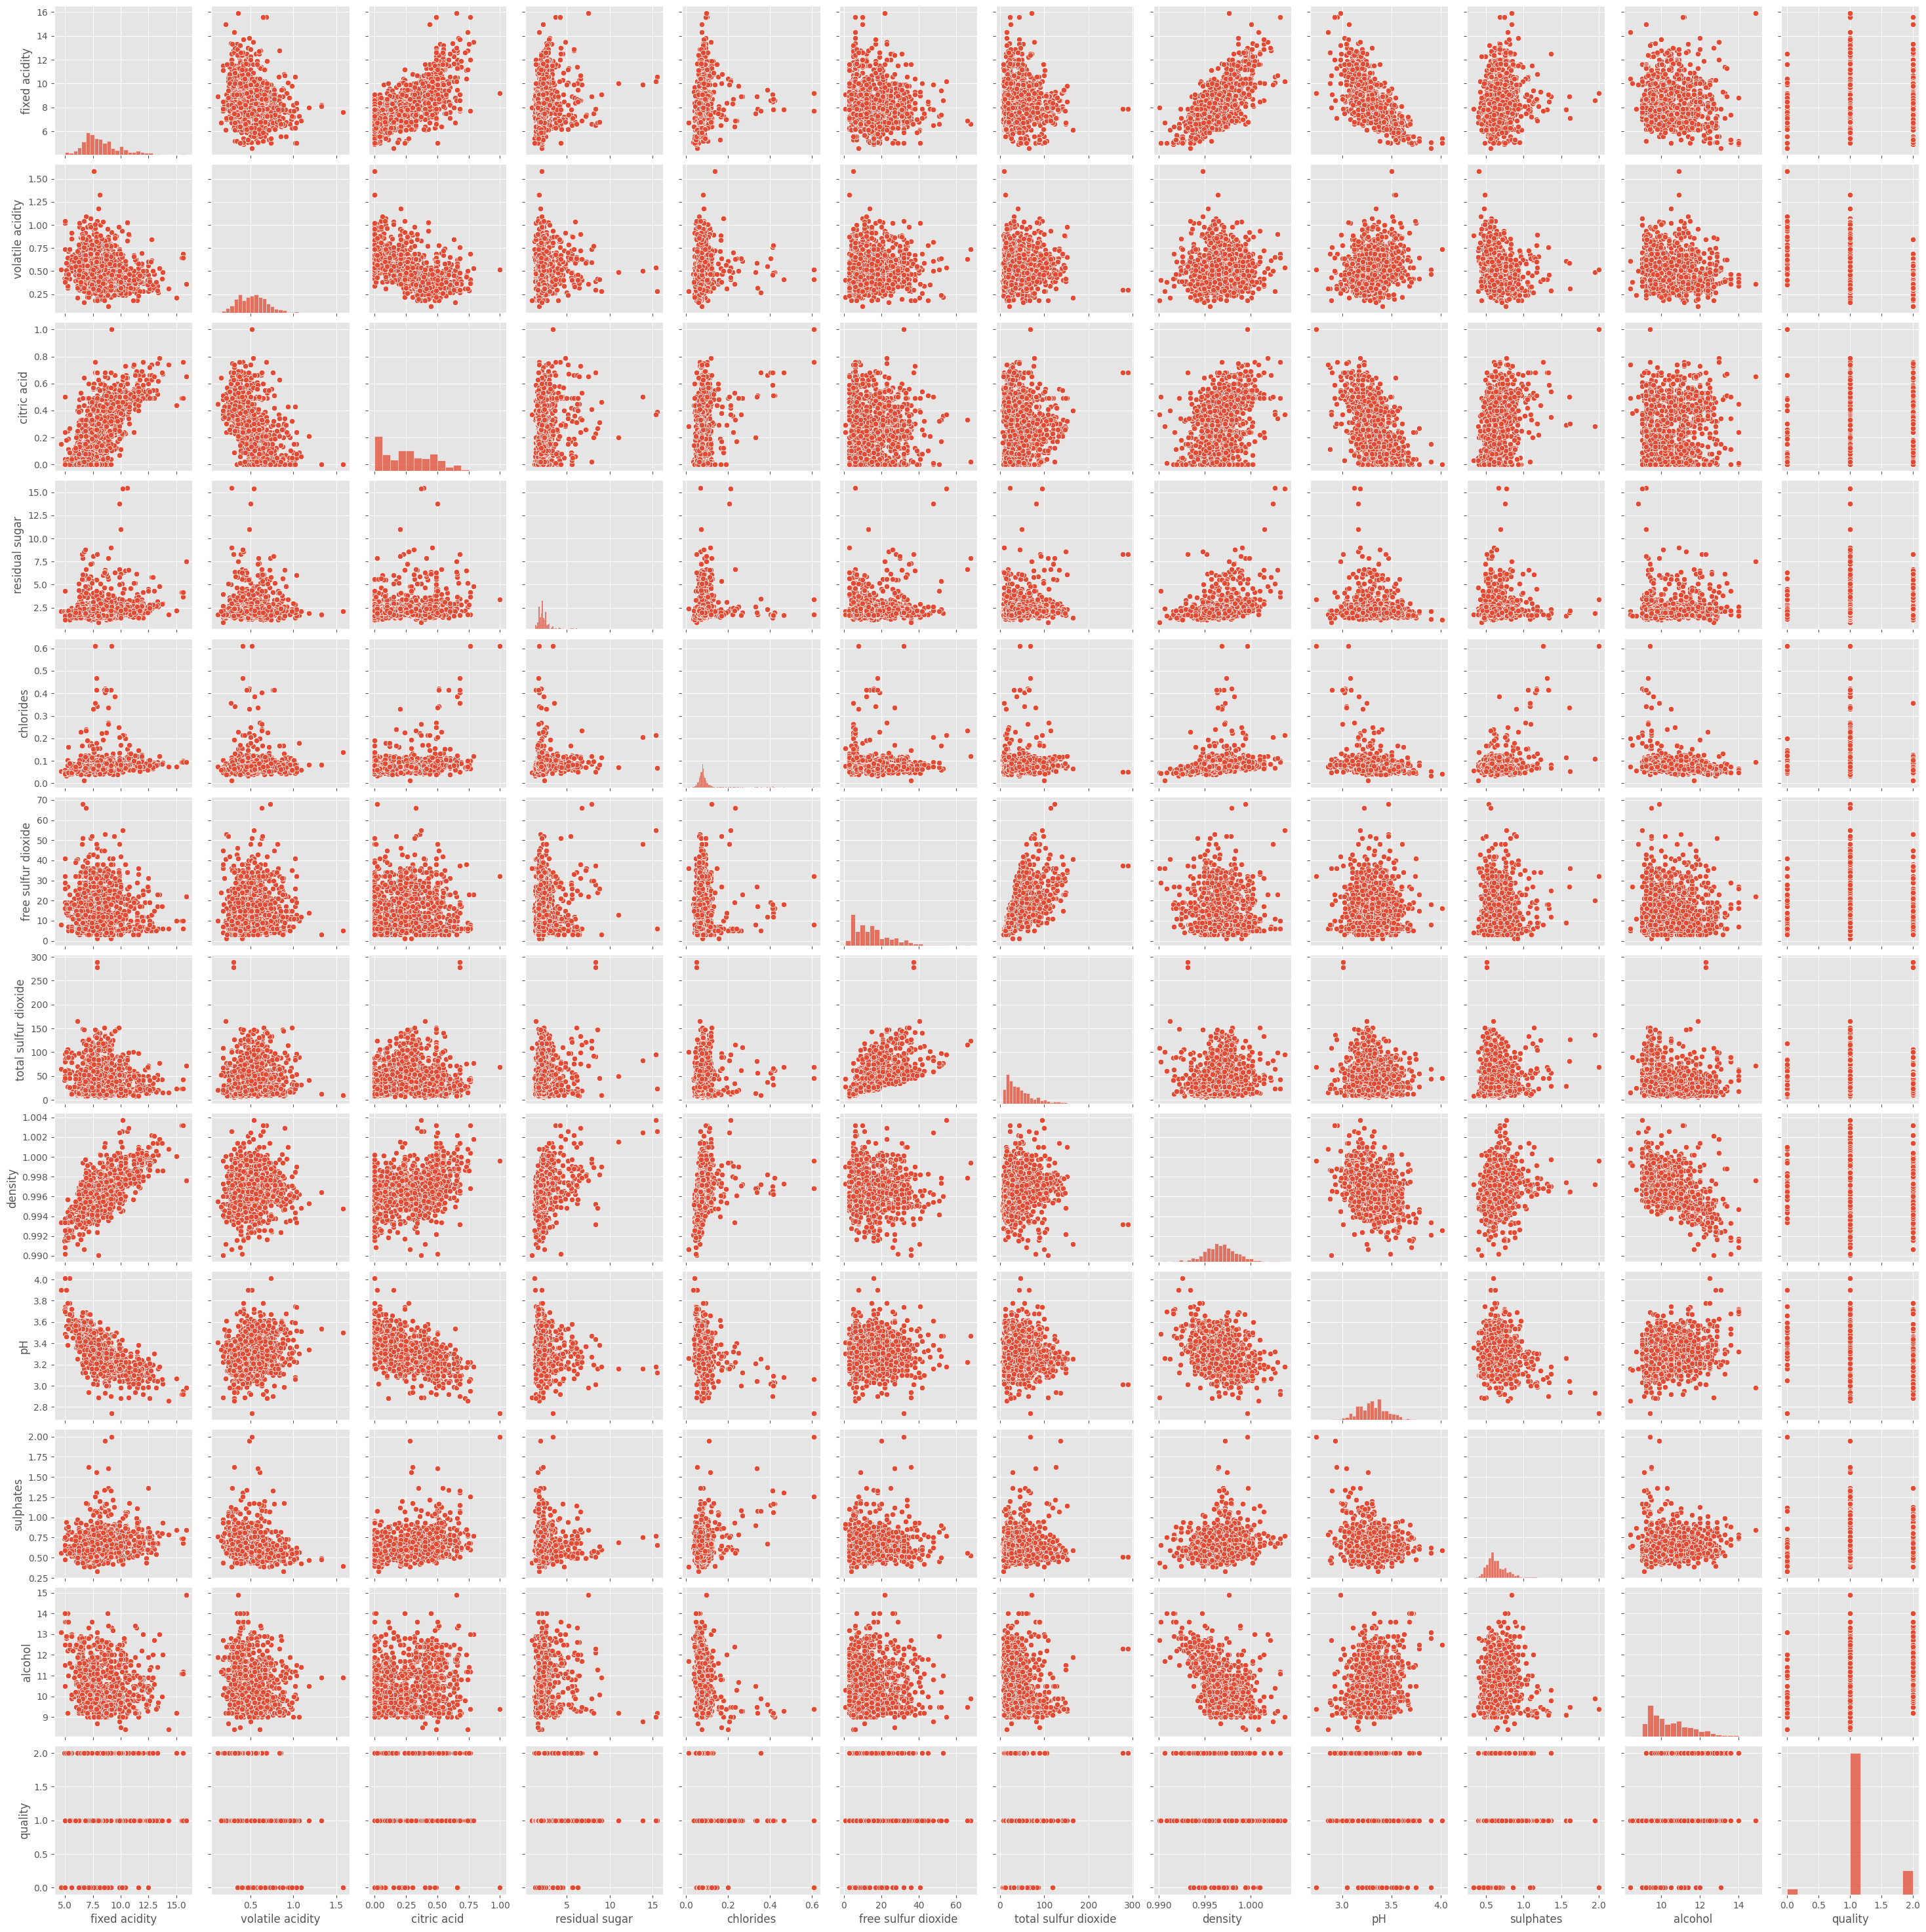

In [19]:
# Relationships:
import seaborn as sns
sns.pairplot(data)

<Axes: >

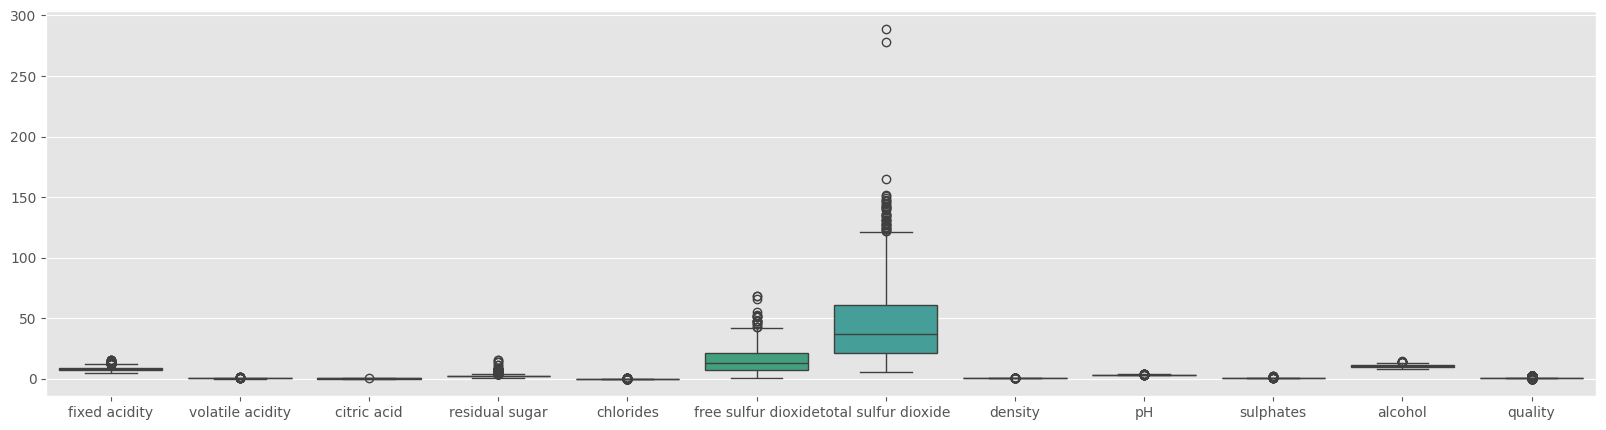

In [22]:
# Outliers:
import seaborn as sns

# Set the figure size 
plt.figure(figsize=(20, 5)) # Width, Height in inches
sns.boxplot(data=data)

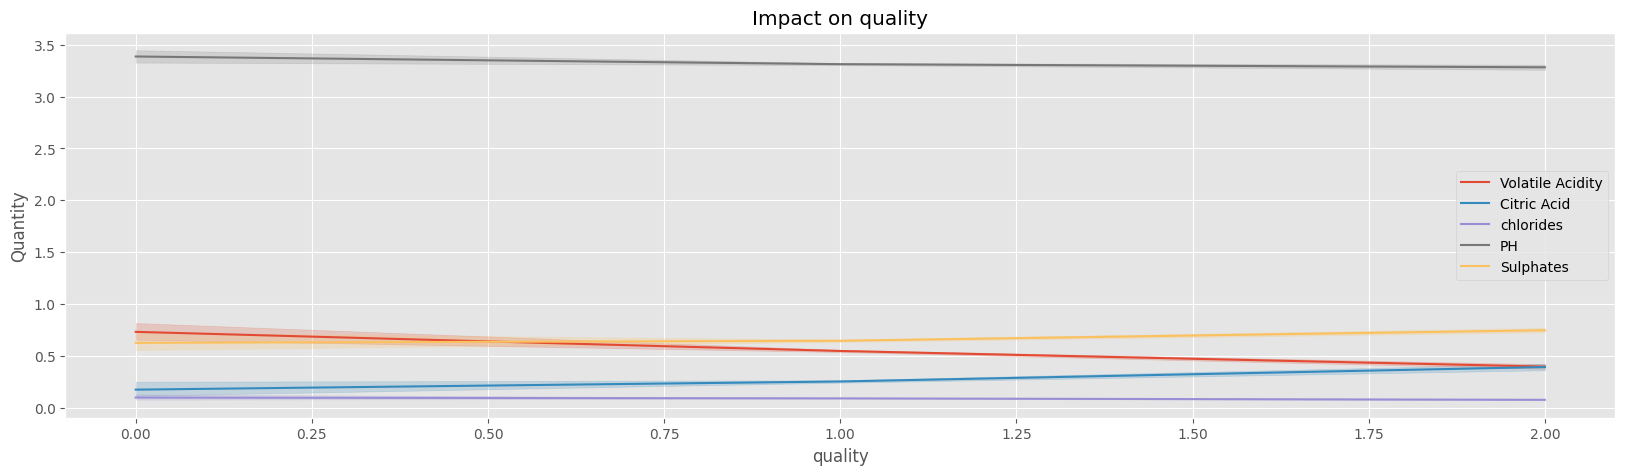

In [15]:
# let see effect some of elements on the quality - details
plt.figure(figsize=(20,5))
sns.lineplot(data=data, x="quality",y="volatile acidity",label="Volatile Acidity")
sns.lineplot(data=data, x="quality",y="citric acid",label="Citric Acid")
sns.lineplot(data=data, x="quality",y="chlorides",label="chlorides")
sns.lineplot(data=data, x="quality",y="pH",label="PH")
sns.lineplot(data=data, x="quality",y="sulphates",label="Sulphates")
plt.ylabel("Quantity")
plt.title("Impact on quality")
plt.legend()
plt.show()

## Choosing Classifier Models

Based on the dataset characteristics, the reccommended models are as following:

#### 1. Imbalance of Classes: 
The dataset is imbalanced, with a majority of the samples in class 1.
**Recommended Models:**
**Random Forest Classifier**: Can handle imbalance well with class weighting.
**Gradient Boosting Classifier**: Effective with imbalanced datasets using boosting.
**Logistic Regression**: Useful if you apply class weights to handle imbalance.
**Support Vector Machine (SVM)**: Can adjust class weights to handle imbalance.

#### 2. Number of Features:
The dataset has 12 features, which is manageable for most models.
**Recommended Models**: All the models mentioned above can handle this number of features efficiently.

#### 3. Relationships and Complexity
The pair plot suggests some non-linear relationships between features.
**Recommended Models**:
**Random Forest Classifier**: Handles non-linear relationships well.
**Gradient Boosting Classifier**: Excels with complex patterns.
**Support Vector Machine (SVM)**: Good for capturing complex decision boundaries with non-linear kernels.

#### 4. Presence of Outliers
Outliers are present in the dataset.
**Recommended Models**:
**Random Forest Classifier**: Robust to outliers due to the aggregation of multiple trees.
**Gradient Boosting Classifier**: Can handle outliers but may require tuning.
**Support Vector Machine (SVM)**: Use with caution as it can be sensitive to outliers unless kernel parameters are tuned.

Summary of Recommended Models
**Random Forest Classifier**:
Why? Handles class imbalance, non-linear relationships, and outliers well.
How to Measure: Adjust class weights and evaluate performance using metrics like accuracy, precision, recall, and F1-score.

**Gradient Boosting Classifier**:
Why? Effective for imbalanced datasets and capturing complex patterns.
How to Measure: Monitor performance with cross-validation and use metrics like accuracy, precision, recall, and F1-score.

**Support Vector Machine (SVM)**:
Why? Capable of handling high-dimensional data and imbalanced classes with class weighting.
How to Measure: Tune hyperparameters and evaluate using accuracy, precision, recall, and F1-score.

**Logistic Regression**:
Why? Simple, interpretable model that can handle imbalance with class weights.
How to Measure: Evaluate performance with metrics like accuracy, precision, recall, and F1-score, particularly focusing on interpretability.

Given these insights, we intend to
- start with Random Forest and Gradient Boosting classifiers to provide a strong foundation
- consider also SVM and Logistic Regression for comparison and interpretability 

Each model should be evaluated using cross-validation and metrics suitable for imbalanced datasets.

## Training Classifier Models

In [23]:
from sklearn.model_selection import train_test_split, cross_val_score 
from sklearn.preprocessing import RobustScaler 
from sklearn.metrics import classification_report

# Split the data 
X = data.drop('quality', axis=1) 
y = data['quality'] 

# Apply robust scaling 
scaler = RobustScaler() 
X_scaled = scaler.fit_transform(X) 

# Split into training and testing sets 
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

#### Random Forest Classifier

In [28]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report

# Train Random Forest model
rf = RandomForestClassifier(class_weight='balanced', random_state=42)
rf.fit(X_train, y_train)

# Cross-validation
cv_scores_rf = cross_val_score(rf, X_train, y_train, cv=5, scoring='f1_weighted')
print(f"Random Forest CV F1 Score: {cv_scores_rf.mean()}")

# Predictions and evaluation
y_pred_rf = rf.predict(X_test)
print("Random Forest Classification Report:\n", 
      classification_report(y_test, y_pred_rf, zero_division=0))



Random Forest CV F1 Score: 0.8380974698504821
Random Forest Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00         6
           1       0.91      0.98      0.95       195
           2       0.84      0.57      0.68        28

    accuracy                           0.91       229
   macro avg       0.59      0.52      0.54       229
weighted avg       0.88      0.91      0.89       229



#### Gradient Boosting Classifier

In [25]:
from sklearn.ensemble import GradientBoostingClassifier

# Train Gradient Boosting model
gb = GradientBoostingClassifier(random_state=42)
gb.fit(X_train, y_train)

# Cross-validation
cv_scores_gb = cross_val_score(gb, X_train, y_train, cv=5, scoring='f1_weighted')
print(f"Gradient Boosting CV F1 Score: {cv_scores_gb.mean()}")

# Predictions and evaluation
y_pred_gb = gb.predict(X_test)
print("Gradient Boosting Classification Report:\n", classification_report(y_test, y_pred_gb))


Gradient Boosting CV F1 Score: 0.8295293342550674
Gradient Boosting Classification Report:
               precision    recall  f1-score   support

           0       0.25      0.17      0.20         6
           1       0.92      0.94      0.93       195
           2       0.64      0.57      0.60        28

    accuracy                           0.87       229
   macro avg       0.60      0.56      0.58       229
weighted avg       0.86      0.87      0.87       229



#### Support Vector Machine (SVM)

In [26]:
from sklearn.svm import SVC

# Train SVM model
svm = SVC(class_weight='balanced', random_state=42)
svm.fit(X_train, y_train)

# Cross-validation
cv_scores_svm = cross_val_score(svm, X_train, y_train, cv=5, scoring='f1_weighted')
print(f"SVM CV F1 Score: {cv_scores_svm.mean()}")

# Predictions and evaluation
y_pred_svm = svm.predict(X_test)
print("SVM Classification Report:\n", classification_report(y_test, y_pred_svm))


SVM CV F1 Score: 0.710920619257457
SVM Classification Report:
               precision    recall  f1-score   support

           0       0.04      0.17      0.06         6
           1       0.94      0.68      0.79       195
           2       0.39      0.86      0.53        28

    accuracy                           0.69       229
   macro avg       0.45      0.57      0.46       229
weighted avg       0.85      0.69      0.74       229



#### Logistic Regression

In [27]:
from sklearn.linear_model import LogisticRegression

# Train Logistic Regression model
log_reg = LogisticRegression(class_weight='balanced', max_iter=1000, random_state=42)
log_reg.fit(X_train, y_train)

# Cross-validation
cv_scores_lr = cross_val_score(log_reg, X_train, y_train, cv=5, scoring='f1_weighted')
print(f"Logistic Regression CV F1 Score: {cv_scores_lr.mean()}")

# Predictions and evaluation
y_pred_lr = log_reg.predict(X_test)
print("Logistic Regression Classification Report:\n", classification_report(y_test, y_pred_lr))


Logistic Regression CV F1 Score: 0.6479649555611202
Logistic Regression Classification Report:
               precision    recall  f1-score   support

           0       0.05      0.50      0.10         6
           1       0.93      0.52      0.67       195
           2       0.35      0.79      0.48        28

    accuracy                           0.55       229
   macro avg       0.44      0.60      0.42       229
weighted avg       0.83      0.55      0.63       229



#### Evaluation Summary
By evaluating the performance of each classifier model using **cross-validation** and **classification reports**, we can determine which model best balances **accuracy**, **F1 score**, and **interpretability** given the imbalanced nature of the dataset.

In [30]:
# Cross-Validation F1 Scores:
rf_cvf1_score = cv_scores_rf.mean()
print(f'Random Forest F1 score: {rf_cvf1_score}')

gb_cvf1_score = cv_scores_gb.mean()
print(f'Gradient Boosting F1 score: {gb_cvf1_score}')

svm_cvf1_score = cv_scores_svm.mean()
print(f'Support Vector Machine (SVM) F1 score: {svm_cvf1_score}')

logreg_cvf1_score = cv_scores_lr.mean()
print(f'Logistic Regression F1 score: {logreg_cvf1_score}')


Random Forest F1 score: 0.8380974698504821
Gradient Boosting F1 score: 0.8295293342550674
Support Vector Machine (SVM) F1 score: 0.710920619257457
Logistic Regression F1 score: 0.6479649555611202


### Summary of Training Different Classifier Models

Summary of cross-validation F1 scores for each model:

- **Random Forest Classifier**: F1 score = **0.8381**
- **Gradient Boosting Classifier**: F1 score = **0.8295**
- **Support Vector Machine (SVM)**: F1 score = **0.7109**
- **Logistic Regression**: F1 score = **0.6480**

### Interpretation and Recommendations

1. **Random Forest Classifier**:
   - **Pros**: Highest F1 score, indicating the best balance between precision and recall. It's robust to outliers and can handle imbalanced datasets well.
   - **Cons**: Moderate interpretability compared to simpler models.
   - **Recommendation**: **Recommended** as the primary model due to its superior performance and robustness.

2. **Gradient Boosting Classifier**:
   - **Pros**: High F1 score, capturing complex patterns and providing good predictive power.
   - **Cons**: More sensitive to outliers compared to Random Forest, requires more tuning.
   - **Recommendation**: **Strongly considered** as an alternative due to its competitive performance.

3. **Support Vector Machine (SVM)**:
   - **Pros**: Good at handling high-dimensional data, can be tuned with different kernels.
   - **Cons**: Lower F1 score compared to ensemble methods, sensitive to outliers, less interpretable.
   - **Recommendation**: **Considered** if interpretability is not a primary concern and you are willing to invest time in tuning.

4. **Logistic Regression**:
   - **Pros**: High interpretability, simple model, handles class imbalance with weights.
   - **Cons**: Lowest F1 score, may not capture complex relationships as effectively.
   - **Recommendation**: **Considered** for its interpretability despite lower performance.

### Conclusion

Given the evaluation results:
- **Primary Recommendation**: **Random Forest Classifier** due to its high F1 score and robustness.
- **Secondary Recommendation**: **Gradient Boosting Classifier** for its competitive performance and capability to capture complex patterns.
- **Additional Consideration**: **Support Vector Machine (SVM)** if tuning can improve its performance.
- **Interpretability Focus**: **Logistic Regression** for insights into feature importance despite its lower predictive power.



### Next Steps

1. **Fine-tuning the Random Forest Model**: Adjust hyperparameters to possibly improve performance.
2. **Model Ensemble**: Explore combining Random Forest and Gradient Boosting for potential performance gains.
3. **Feature Engineering**: Further refine features to enhance model performance: interaction and polynomial features, log transformation and scaling.
4. **Address Imbalance**: Continue exploring techniques like SMOTE to balance the dataset more effectively.


### Feature Engineering

#### 1. Interaction Features:
Create new features by combining two or more existing features. This can help capture relationships between features that are not evident in the original data.

In [31]:
data['alcohol_density_interaction'] = data['alcohol'] * data['density']

#### 2. Polynomial Features:
Add polynomial terms of the features to capture non-linear relationships.

In [34]:
from sklearn.preprocessing import PolynomialFeatures

# Generate polynomial features 
poly = PolynomialFeatures(degree=2, include_bias=False) 
input_features = data.drop('quality', axis=1).columns 
poly_features = poly.fit_transform(data.drop('quality', axis=1)) 

# Ensure the feature names are consistent 
poly_feature_names = poly.get_feature_names_out(input_features) 
data_poly = pd.DataFrame(poly_features, columns=poly_feature_names)

#### 3. Log Transformation:
Apply log transformation to skewed features to reduce the impact of outliers and normalize distributions.

In [35]:
data['log_alcohol'] = np.log1p(data['alcohol'])


#### 4. Bin Continuous Variables:
Convert continuous variables into categorical ones by binning. This can help models detect patterns in ranges.

In [36]:
data['alcohol_bin'] = pd.cut(data['alcohol'], bins=5)

#### 5. Feature Scaling:
Apply scaling to ensure features are on a similar scale, especially for distance-based algorithms.

In [39]:

# Scaling 
scaler = RobustScaler() 
X = scaler.fit_transform(data_poly) 
y = data['quality']


### Addressing Class Imbalance

#### 1. Synthetic Minority Over-sampling Technique (SMOTE):
Generate synthetic samples for the minority class to balance the class distribution.

In [42]:
from imblearn.over_sampling import SMOTE
import warnings
warnings.filterwarnings('ignore')


smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)


#### 2. Random Over-sampling and Under-sampling:
Oversample the minority class or undersample the majority class to balance the dataset.

In [43]:
from imblearn.combine import SMOTEENN

smote_enn = SMOTEENN(random_state=42)
X_resampled, y_resampled = smote_enn.fit_resample(X_train, y_train)


#### 3. Class Weight Adjustment:
Adjust the class weights in your models to penalize misclassification of the minority class more heavily.

In [44]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(class_weight='balanced', random_state=42)
rf.fit(X_train, y_train)

# Cross-validation for Random Forest 
cv_scores_rf = cross_val_score(rf, X_train_smote, y_train_smote, cv=5, scoring='f1_weighted') 
print(f"Random Forest CV F1 Score with SMOTE and Feature Engineering: {cv_scores_rf.mean()}") 

# Predictions and evaluation for Random Forest 
y_pred_rf = rf.predict(X_test) 
print("Random Forest Classification Report with SMOTE and Feature Engineering:\n", classification_report(y_test, y_pred_rf, zero_division=0))


Random Forest CV F1 Score with SMOTE and Feature Engineering: 0.9335185175357343
Random Forest Classification Report with SMOTE and Feature Engineering:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00         6
           1       0.91      0.98      0.95       195
           2       0.84      0.57      0.68        28

    accuracy                           0.91       229
   macro avg       0.59      0.52      0.54       229
weighted avg       0.88      0.91      0.89       229



#### 4. Algorithmic Techniques:
Use algorithms that are inherently capable of handling imbalanced datasets, such as Gradient Boosting with customized loss functions.

In [45]:
# Train Gradient Boosting model with customized loss functions and SMOTE-applied data 
gb = GradientBoostingClassifier(random_state=42) 
gb.fit(X_train_smote, y_train_smote) 

# Cross-validation for Gradient Boosting 
cv_scores_gb = cross_val_score(gb, X_train_smote, y_train_smote, cv=5, scoring='f1_weighted') 
print(f"Gradient Boosting CV F1 Score with SMOTE and Feature Engineering: {cv_scores_gb.mean()}") 

# Predictions and evaluation for Gradient Boosting 
y_pred_gb = gb.predict(X_test) 
print("Gradient Boosting Classification Report with SMOTE and Feature Engineering:\n", classification_report(y_test, y_pred_gb, zero_division=0))

Gradient Boosting CV F1 Score with SMOTE and Feature Engineering: 0.8956867408650862
Gradient Boosting Classification Report with SMOTE and Feature Engineering:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00         6
           1       0.94      0.82      0.87       195
           2       0.45      0.82      0.58        28

    accuracy                           0.80       229
   macro avg       0.46      0.55      0.49       229
weighted avg       0.85      0.80      0.82       229



# FINAL CONCLUSION

### Random Forest Classifier
- **Cross-Validation F1 Score**: 0.9335 (Very high, indicating excellent performance)
- **Classification Report**:
  - **Class 0**: Precision, Recall, F1-Score are 0.00 (Class 0 is not well predicted, likely due to very few samples)
  - **Class 1**: Precision (0.91), Recall (0.98), F1-Score (0.95) (Class 1 is very well predicted)
  - **Class 2**: Precision (0.84), Recall (0.57), F1-Score (0.68) (Class 2 is moderately well predicted)
  - **Accuracy**: 0.91
  - **Macro Average F1-Score**: 0.54 (Reflects poor performance for minority class)
  - **Weighted Average F1-Score**: 0.89

### Gradient Boosting Classifier
- **Cross-Validation F1 Score**: 0.8957 (High, but slightly lower than Random Forest)
- **Classification Report**:
  - **Class 0**: Precision, Recall, F1-Score are 0.00 (Class 0 is not well predicted, likely due to very few samples)
  - **Class 1**: Precision (0.94), Recall (0.82), F1-Score (0.87) (Class 1 is well predicted)
  - **Class 2**: Precision (0.45), Recall (0.82), F1-Score (0.58) (Class 2 is moderately well predicted)
  - **Accuracy**: 0.80
  - **Macro Average F1-Score**: 0.49 (Reflects poor performance for minority class)
  - **Weighted Average F1-Score**: 0.82

### Insights and Recommendations
1. **Performance**: Both models show high overall performance, with Random Forest slightly outperforming Gradient Boosting in terms of the F1 score and overall accuracy.
2. **Class Imbalance Impact**: Class 0 is not well predicted by either model, likely due to the small number of samples. This suggests that further balancing techniques or more data for this class are needed.
3. **Model Choice**: Given the results, the **Random Forest Classifier** is recommended due to its higher F1 score and robustness in handling imbalanced data.

### Next Steps
1. **Further Class Balancing**:
   - Explore additional techniques to handle the class imbalance for Class 0, such as SMOTE or other synthetic data generation methods.
   - Consider collecting more data for the underrepresented class.
   
2. **Hyperparameter Tuning**:
   - Fine-tune hyperparameters for both Random Forest and Gradient Boosting to potentially improve performance further.
   
3. **Ensemble Methods**:
   - Explore combining predictions from multiple models to improve overall performance, particularly for the minority class.

4. **Feature Engineering**:
   - Continue experimenting with different feature engineering techniques to uncover more predictive patterns in the data.

